In [1]:
### Library Imports
import pandas as pd
import pandasql as ps


### Script Imports
import utils
import final_account
import final_card
import final_client
import final_districts
import final_loans
import final_trans


### Get all dataframes

accounts = final_account.cleanup()
card = final_card.cleanup()
clients = final_client.cleanup()
districts = final_districts.cleanup()
loans = final_loans.cleanup()
trans = final_trans.cleanup()
disp = pd.read_csv('../../project/banking_data/disp.csv', sep=';')




C:\Users\Hugo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
### Merge everything with sequel queries

### Create copy
df = loans.copy()


### Merge accounts
df = df.merge(accounts, how='left', on="account_id")
df = df.rename(columns={"date_x": "loan_date", "date_y" : "account_date"})

### Merge Disp
### Mover para cleanup
q1 = "SELECT * FROM disp WHERE Type='OWNER'"
disp = ps.sqldf(q1)
df = df.merge(disp, how='left', on="account_id")

# print(df)
### Merge Clients
clts = clients.drop(columns=['district_id'])
df = df.merge(clts, how='left', on="client_id")

### Merge Districts 
distrs = districts.rename(columns={"code ": "district_id"})
df = df.merge(distrs, how='left', on="district_id")


df.columns
### Merge transactions
trans2 = trans.rename(columns={"type": "trans_type" , "amount":"trans_ammount"})
df = df.merge(trans2, how='left', on="account_id")

# ### Merge Card
# ## TODO: Rename issue column to date_something
# card = card.rename(columns={"type": "type_card"})
# df = df.merge(card, how='left', on="disp_id")


df

### Merge

,loan_id,account_id,loan_date,amount,duration,payments,status,district_id,frequency,account_date,...,no. of commited crimes '95,no. of commited crimes '96,crime_growth,total_crime,trans_id,date,trans_type,operation,trans_ammount,balance
0,5314,1787,05-07-1993,96396,12,8033,-1,30,weekly issuance,22-03-1993,...,2985.0,2804,-181.0,5789.0,524055,21-05-1993,credit,credit in cash,5800.0,16800.0
1,5314,1787,05-07-1993,96396,12,8033,-1,30,weekly issuance,22-03-1993,...,2985.0,2804,-181.0,5789.0,524056,20-06-1993,credit,credit in cash,3300.0,20100.0
2,5316,1801,11-07-1993,165960,36,4610,1,46,monthly issuance,13-02-1993,...,2854.0,2618,-236.0,5472.0,527456,28-02-1993,credit,credit in cash,18972.0,19674.9
3,5316,1801,11-07-1993,165960,36,4610,1,46,monthly issuance,13-02-1993,...,2854.0,2618,-236.0,5472.0,528025,15-03-1993,credit,credit in cash,3700.0,23374.9
4,5316,1801,11-07-1993,165960,36,4610,1,46,monthly issuance,13-02-1993,...,2854.0,2618,-236.0,5472.0,527446,16-03-1993,credit,credit in cash,8368.0,31742.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17788,7308,11362,27-12-1996,129408,24,5392,1,67,monthly issuance,14-10-1995,...,3244.0,3079,-165.0,6323.0,3424164,06-12-1996,withdrawal,remittance to another bank,129.0,39765.5
17789,7308,11362,27-12-1996,129408,24,5392,1,67,monthly issuance,14-10-1995,...,3244.0,3079,-165.0,6323.0,3424358,07-12-1996,withdrawal,withdrawal in cash,10400.0,29365.5
17790,7308,11362,27-12-1996,129408,24,5392,1,67,monthly issuance,14-10-1995,...,3244.0,3079,-165.0,6323.0,3424116,07-12-1996,withdrawal,remittance to another bank,330.0,29035.5
17791,7308,11362,27-12-1996,129408,24,5392,1,67,monthly issuance,14-10-1995,...,3244.0,3079,-165.0,6323.0,3424068,08-12-1996,withdrawal,remittance to another bank,56.0,28979.5


In [4]:
def normalize(df):

    columns = df.columns

    for col in columns:
        col_min = df[col].min()
        col_max =  df[col].max()
        
        df[col] = (df[col] - col_min)/\
                    (col_max - col_min)
            

In [21]:
f = utils.normalization(clients,"gender")
f = utils.normalization(f,"birth_number")
normalize(f)



,client_id,birth_number,gender,district_id
0,0.000000,0.418408,0.0,0.223684
1,0.000071,0.096897,1.0,0.000000
2,0.000143,0.281613,0.0,0.000000
3,0.000214,0.032088,1.0,0.052632
4,0.000286,0.080220,0.0,0.052632
...,...,...,...,...
5364,0.996928,0.972134,0.0,0.000000
5365,0.996999,0.163183,1.0,0.000000
5366,0.997857,0.396242,1.0,0.789474
5367,0.998071,0.607135,0.0,0.868421


In [91]:
### Full Normalization

cp = df.copy()
ct2 = clients.copy()

features = ['loan_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'frequency', 'account_date', 'type', 'birth_number', 'gender', 'name ', 'region',
       'no. of inhabitants', 'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       "unemploymant rate '95 ", "unemploymant rate '96 ",
       'unemploymant_growth', 'no. of enterpreneurs per 1000 inhabitants ',
       "no. of commited crimes '95 ", "no. of commited crimes '96 ",
       'crime_growth', 'total_crime', 'date', 'trans_type',
       'operation', 'trans_ammount', 'balance']

categorical = ['type','gender', 'name ', 'region',
               'trans_type', 'operation','frequency']

df2 = pd.get_dummies(cp,columns=categorical)
df2.columns


KeyError: 'type_OWNER'

In [6]:
def full_normalization(df):
    
    cp = df.copy()
    columns = cp.columns

    for column in columns:
        if(cp[column].dtypes != 'int64' or cp[column].dtypes != 'float64'):
            cp = utils.normalization(cp,column)

    normalize(cp)
    return cp

In [94]:
### Logistic Regression

# df2 = df2.drop('type_OWNER',axis=1)

### Data splitting into X & y
df2 = utils.normalization(df2,"status")
df2 = utils.normalization(df2,"date")
df2 = utils.normalization(df2,"account_date")
df2 = utils.normalization(df2,"birth_number")
df2 = utils.normalization(df2,"loan_date")

X = df2.drop('status',axis=1)
y = df2['status'] 

X.shape 
y.shape
 
df2.head()

,loan_id,account_id,loan_date,amount,duration,payments,status,district_id,account_date,disp_id,...,trans_type_withdrawal,trans_type_withdrawal in cash,operation_collection from another bank,operation_credit card withdrawal,operation_credit in cash,operation_remittance to another bank,operation_withdrawal in cash,frequency_issuance after transaction,frequency_monthly issuance,frequency_weekly issuance
0,5314,1787,50,96396,12,8033,0,30,207,2166,...,0,0,0,0,1,0,0,0,0,1
1,5314,1787,50,96396,12,8033,0,30,207,2166,...,0,0,0,0,1,0,0,0,0,1
2,5316,1801,108,165960,36,4610,1,46,115,2181,...,0,0,0,0,1,0,0,0,1,0
3,5316,1801,108,165960,36,4610,1,46,115,2181,...,0,0,0,0,1,0,0,0,1,0
4,5316,1801,108,165960,36,4610,1,46,115,2181,...,0,0,0,0,1,0,0,0,1,0


In [107]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
tree.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(df2.drop('status',axis=1)):
    print(f'feature importance {column} {tree.feature_importances_[i]}')
    
    fi_col.append(column)
    fi.append(tree.feature_importances_[i])
    
    

feature importance loan_id 0.0
feature importance account_id 0.0
feature importance loan_date 0.04413284287829539
feature importance amount 0.12398882862050455
feature importance duration 0.0
feature importance payments 0.1622614828928423
feature importance district_id 0.0
feature importance account_date 0.0965907888898338
feature importance disp_id 0.0
feature importance client_id 0.04668731593797119
feature importance birth_number 0.09563100403514255
feature importance no. of inhabitants 0.02967863097360778
feature importance no. of municipalities with inhabitants < 499  0.0
feature importance no. of municipalities with inhabitants 500-1999 0.0
feature importance no. of municipalities with inhabitants 2000-9999  0.0
feature importance no. of municipalities with inhabitants >10000  0.0
feature importance no. of cities  0.0
feature importance ratio of urban inhabitants  0.015749601649676166
feature importance average salary  0.06981993439440486
feature importance unemploymant rate '95 

In [106]:
from sklearn.feature_selection import SelectKBest, chi2

X2 = full_normalization(X)

print(X2.shape)
X2_new = SelectKBest(chi2, k=20).fit_transform(X2, y)
print(X2_new.shape)


(17793, 125)
(17793, 20)


In [117]:
fi_df = zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['feature','feature_importance'])

fi_df.sort_values('feature_importance',ascending=False).reset_index()

top20 = fi_df['feature'][0:20]
top20

0                                               loan_id
1                                            account_id
2                                             loan_date
3                                                amount
4                                              duration
5                                              payments
6                                           district_id
7                                          account_date
8                                               disp_id
9                                             client_id
10                                         birth_number
11                                   no. of inhabitants
12        no. of municipalities with inhabitants < 499 
13      no. of municipalities with inhabitants 500-1999
14    no. of municipalities with inhabitants 2000-9999 
15       no. of municipalities with inhabitants >10000 
16                                       no. of cities 
17                          ratio of urban inhab

In [127]:
df2[top20].shape
X = df2[top20].values
X

print(X.shape)
print(y.shape)

(17793, 20)
(17793,)


In [176]:
from sklearn.model_selection import train_test_split
### First split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=15)
### Second split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,train_size=0.9,test_size=0.1, random_state=15)

print(X_train.shape)
print(y_train.shape)
# print(X_valid.shape)
# print(y_valid.shape)



(14234, 20)
(14234,)


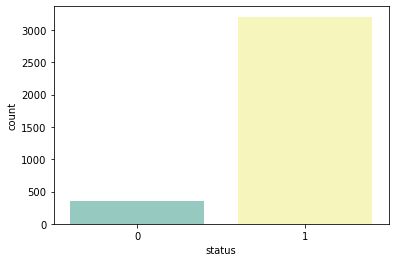

In [177]:
import seaborn as sns

ax = sns.countplot(x=y_test,palette="Set3")

In [178]:
from sklearn.linear_model import LogisticRegression

### Training the model
log_reg = LogisticRegression(random_state=10,solver='lbfgs',max_iter=200).fit(X_train,y_train)
log_reg

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=200, random_state=10)

In [183]:

### Predicting the class labels
y_pred = log_reg.predict(X_train)

### Probability estimations
pred_probabilities = log_reg.predict_proba(X_train)

### Coeficient
log_reg.coef_

print(y_pred)
print(pred_probabilities)
print(log_reg.coef_)


[1 1 1 ... 1 1 1]
[[0.10685385 0.89314615]
 [0.32264131 0.67735869]
 [0.03980078 0.96019922]
 ...
 [0.02391705 0.97608295]
 [0.01792796 0.98207204]
 [0.04612556 0.95387444]]
[[-9.29371365e-04 -2.68003896e-04 -1.79085062e-03 -1.63471177e-06
  -2.01405684e-04 -2.21363014e-04  5.47944001e-04 -3.76157044e-03
  -2.06712744e-03  2.49259644e-03 -8.06680182e-04 -4.36191856e-06
   7.68846414e-04  1.02221041e-03  1.26480607e-04  1.50277061e-05
   1.58322366e-05 -7.69525261e-04  1.02631924e-03 -5.80300921e-05]]


In [191]:
from sklearn.metrics import classification_report

### Evaluating the model

### Accuracy on train
train_score = log_reg.score(X_train,y_train)

### Accuracy on test
test_score = log_reg.score(X_test,y_test)


### Classification Report
report = classification_report(y_train,y_pred)

print(train_score)
print(test_score)
print(report)


0.8937052128705916
0.8996909244169711
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1488
           1       0.90      1.00      0.94     12746

    accuracy                           0.89     14234
   macro avg       0.45      0.50      0.47     14234
weighted avg       0.80      0.89      0.85     14234



In [194]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes=None,title='COnfusion Matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0,vmax=1,annot=True,annot_kws={'size':50})
    else:
        sns.heatmap(cm,vmin=0,vmax=1)

    plt.title=title
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    

        

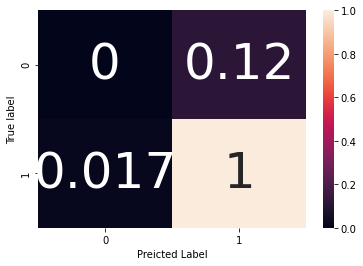

In [207]:
from sklearn.metrics import confusion_matrix
### Visualize confusion matrix
cm = confusion_matrix(y_train,y_pred)
cm

cm_norm = cm / cm.sum(axis=1)

cm_norm

plot_confusion_matrix(cm_norm,classes=log_reg.classes_)


In [212]:
import numpy as np
### analysis

fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

print(fp)
print(fn)
print(tp)
print(tn)

[  25 1488]
[1488   25]
[    0 12721]
[12721     0]
